# Used Car Sell Analysis 


S-1: Importing the Libraries 

In [1]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

S-2: Importing the Dataset

In [2]:
car_data= pd.read_csv("C:/Users/sainanthan/Downloads/Car Sell Dataset.csv")

In [3]:
car_data.shape

(140904, 12)

In [4]:
car_data.head()

,Brand,Model Name,Model Variant,Car Type,Transmission,Fuel Type,Year,Kilometers,Owner,State,Accidental,Price
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654,1st,Rajasthan,No,547253
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351,1st,Maharashtra,No,512050
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090,3rd+,Tamil Nadu,No,678923
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979,1st,Andhra Pradesh,No,522500
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591,3rd+,Bihar,No,401182


In [5]:
car_data.tail()

,Brand,Model Name,Model Variant,Car Type,Transmission,Fuel Type,Year,Kilometers,Owner,State,Accidental,Price
140899,Mahindra,Scorpio,W11,SUV,Manual,Petrol,2002,62699,1st,Telangana,No,221067
140900,Hyundai,i10,Era,Hatchback,Manual,Petrol,2013,47953,2nd,Maharashtra,No,745360
140901,Honda,Jazz,V,Sedan,Automatic,Diesel,2009,134566,3rd+,Odisha,No,122852
140902,Honda,WR-V,E,SUV,Manual,Diesel,2022,88697,1st,Gujarat,No,502425
140903,Chevrolet,Tavera,Base,MPV,Manual,Diesel,2009,48117,2nd,Gujarat,No,905080


In [6]:
car_data.describe()

,Year,Kilometers,Price
count,140904.000000,140904.000000,1.409040e+05
mean,2016.960391,95024.595987,7.617872e+05
std,5.106106,49133.157878,4.438578e+05
min,2000.000000,10000.000000,5.005500e+04
25%,2014.000000,52421.000000,4.116420e+05
50%,2018.000000,94973.500000,6.828030e+05
75%,2021.000000,137618.000000,1.034178e+06
max,2023.000000,179998.000000,2.744280e+06


S-3: Data Cleaning

In [7]:
# Checking Null Values 
car_data.isnull().sum()

Brand            0
Model Name       0
Model Variant    0
Car Type         0
Transmission     0
Fuel Type        0
Year             0
Kilometers       0
Owner            0
State            0
Accidental       0
Price            0
dtype: int64

In [8]:
# Checking Duplicates Values 
car_data.duplicated().sum()

np.int64(0)

In [9]:
# Outliers Check 
# Checking Distribusion For Price 
car_data['Price'].describe()

count    1.409040e+05
mean     7.617872e+05
std      4.438578e+05
min      5.005500e+04
25%      4.116420e+05
50%      6.828030e+05
75%      1.034178e+06
max      2.744280e+06
Name: Price, dtype: float64

In [10]:
# Check distribution of Kilometers
car_data['Kilometers'].describe()

count    140904.000000
mean      95024.595987
std       49133.157878
min       10000.000000
25%       52421.000000
50%       94973.500000
75%      137618.000000
max      179998.000000
Name: Kilometers, dtype: float64

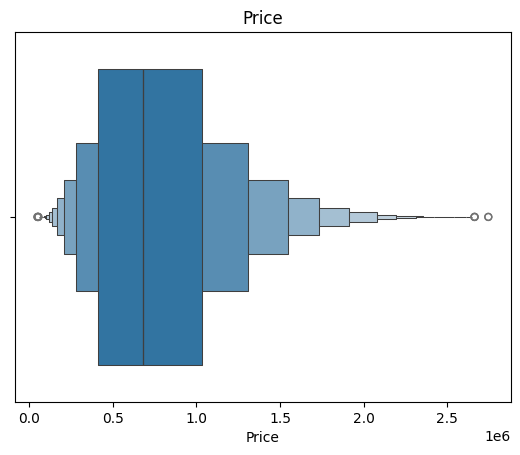

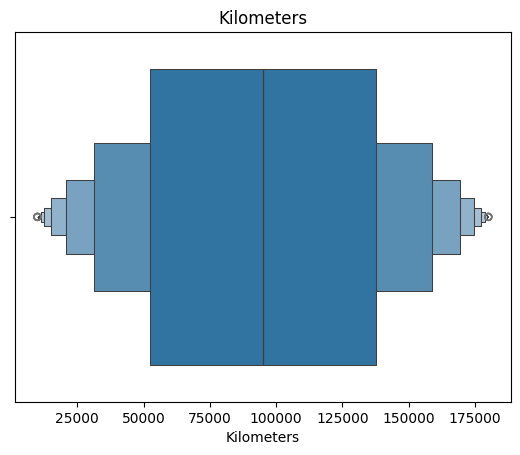

In [11]:
# Visualize outliers with Boxplots

# Price 
sns.boxenplot(x=car_data['Price'])
plt.title('Price')
plt.show()

# Kilometers 
sns.boxenplot(x=car_data['Kilometers'])
plt.title('Kilometers')
plt.show()

In [12]:
# Handling Outliers in Price

Q1 = car_data['Price'].quantile(0.25)
Q3 = car_data['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = car_data[(car_data['Price'] < lower_bound) | (car_data['Price'] > upper_bound)]
print("Number of outliers in Price:", outliers.shape[0])


Number of outliers in Price: 1820


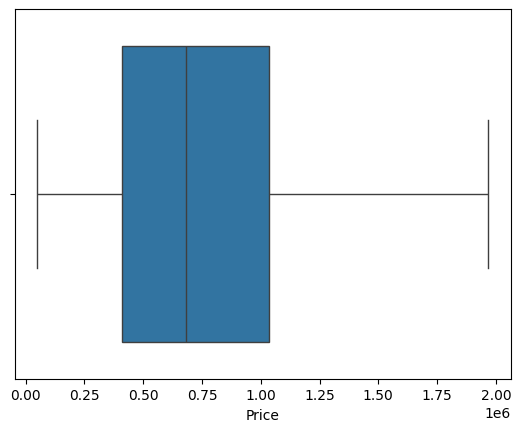

In [13]:
# Apply capping

car_data['Price'] = car_data['Price'].clip(lower=lower_bound, upper=upper_bound)

# Re-checking boxplot for Price to confirm outliers are controlled

sns.boxplot(x=car_data['Price'])
plt.show()


In [14]:
# Detect Outliers in Kilometers

Q1 = car_data['Kilometers'].quantile(0.25)
Q3 = car_data['Kilometers'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_km = car_data[(car_data['Kilometers'] < lower_bound) | (car_data['Kilometers'] > upper_bound)]
print("Number of outliers in Kilometers:", outliers_km.shape[0])


Number of outliers in Kilometers: 0


S-4: Exploratory Data Analysis (EDA)

In [15]:
# Basic Univariate Analysis
# Categorical features:

brand= car_data['Brand'].value_counts().head(10)
car_type = car_data['Car Type'].value_counts().head(10)
transmission = car_data['Transmission'].value_counts().head(10)
fuel = car_data['Fuel Type'].value_counts().head(10)
owners= car_data['Owner'].value_counts().head(10)



In [16]:
print("Most cars are ",(brand))
print("majority are ",(car_type))
print("Fuels are ",(fuel))
print("Transmission is ",(transmission))
print("Owner is ",(owners))


Most cars are  Brand
Maruti Suzuki    54030
Hyundai          22090
Honda            11936
Toyota           10483
Mahindra          9618
Tata              8825
Ford              5217
Volkswagen        3716
Renault           3024
Nissan            2184
Name: count, dtype: int64
majority are  Car Type
Hatchback    55890
Sedan        36897
SUV          35057
MPV           9702
Luxury        3358
Name: count, dtype: int64
Fuels are  Fuel Type
Petrol      79187
Diesel      42038
CNG         14054
Electric     2853
Hybrid       2772
Name: count, dtype: int64
Transmission is  Transmission
Manual       119793
Automatic     21111
Name: count, dtype: int64
Owner is  Owner
1st     75429
2nd     56492
3rd+     8983
Name: count, dtype: int64


In [17]:
print("Most cars brand are Maruti Suzuki -> ",max(brand))
print("majority cartype are Hatchback  -> ",max(car_type))
print("Most Fuels are Petrol -> ",max(fuel))
print("Transmission are  Manual -> ",max(transmission))
print(" Most Owners are 1st -> ",max(owners))


Most cars brand are Maruti Suzuki ->  54030
majority cartype are Hatchback  ->  55890
Most Fuels are Petrol ->  79187
Transmission are  Manual ->  119793
 Most Owners are 1st ->  75429


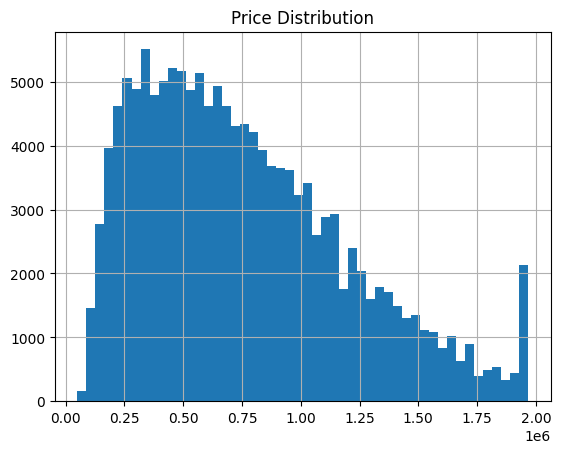

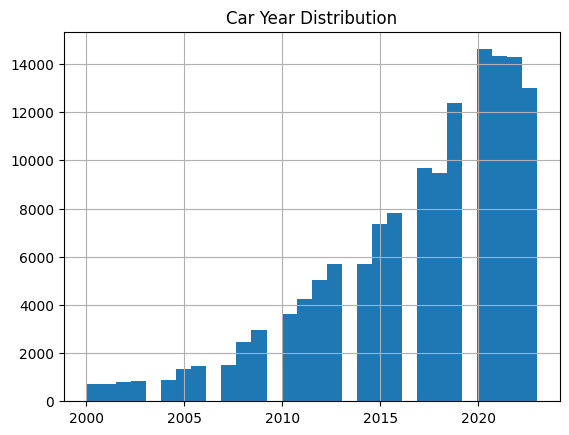

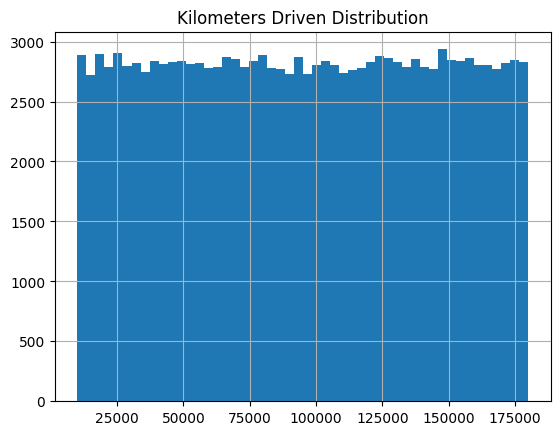

In [18]:
# Numerical features:
car_data['Price'].hist(bins=50)
plt.title("Price Distribution")
plt.show()

car_data['Year'].hist(bins=30)
plt.title("Car Year Distribution")
plt.show()

car_data['Kilometers'].hist(bins=50)
plt.title("Kilometers Driven Distribution")
plt.show()

In [19]:
# Bivariate Analysis

car_data['Price'].describe()
car_data['Year'].describe()
car_data['Kilometers'].describe()


count    140904.000000
mean      95024.595987
std       49133.157878
min       10000.000000
25%       52421.000000
50%       94973.500000
75%      137618.000000
max      179998.000000
Name: Kilometers, dtype: float64

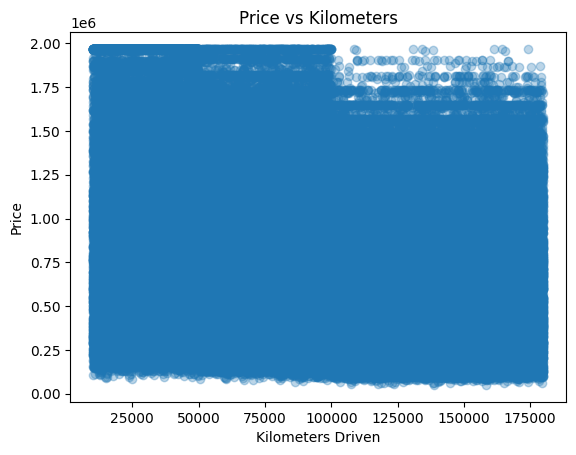

In [20]:
plt.scatter(car_data['Kilometers'], car_data['Price'], alpha=0.3)
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.title("Price vs Kilometers")
plt.show()


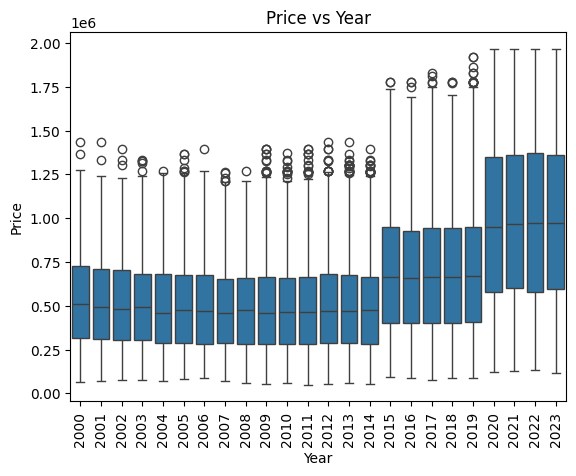

In [21]:

sns.boxplot(x='Year', y='Price', data=car_data)
plt.xticks(rotation=90)
plt.title("Price vs Year")
plt.show()


In [22]:
# Key Relationships
# Price vs Brand

avg_price_brand = car_data.groupby('Brand')['Price'].mean().sort_values(ascending=False)
print(avg_price_brand.head(10))


Brand
MG             1.015476e+06
Kia            9.959467e+05
Tata           8.986929e+05
Renault        8.815112e+05
Range Rover    8.406747e+05
Jaguar         7.884679e+05
Toyota         7.879124e+05
Skoda          7.715795e+05
Hyundai        7.607502e+05
Audi           7.593236e+05
Name: Price, dtype: float64


In [23]:
# Price vs Car Type

avg_price_type = car_data.groupby('Car Type')['Price'].mean().sort_values(ascending=False)
print(avg_price_type)

Car Type
Luxury       842951.507668
SUV          838615.605895
Hatchback    760213.788582
MPV          753671.272238
Sedan        677408.797998
Name: Price, dtype: float64


In [24]:
# Price vs Fuel Type

avg_price_fuel = car_data.groupby('Fuel Type')['Price'].mean().sort_values(ascending=False)
print(avg_price_fuel)

Fuel Type
Electric    833447.413205
Hybrid      798337.300280
Petrol      762273.901338
Diesel      759387.603237
CNG         722119.129723
Name: Price, dtype: float64


In [25]:
# Price vs Transmission

avg_price_trans = car_data.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
print(avg_price_trans)

Transmission
Automatic    818459.822373
Manual       749178.106362
Name: Price, dtype: float64


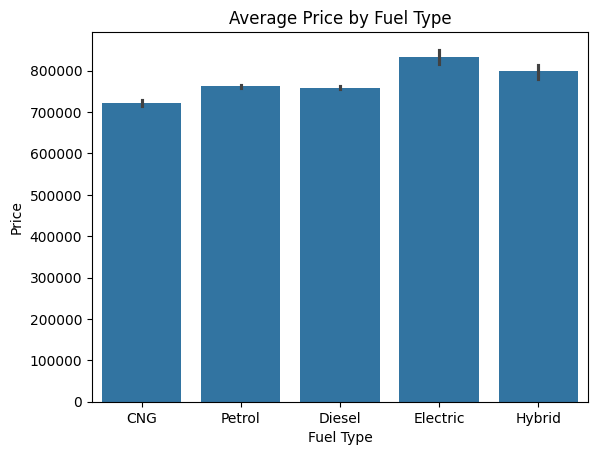

In [26]:
# Visualization 

# Average Price by Fuel Type

sns.barplot(x='Fuel Type', y='Price', data=car_data, estimator='mean')
plt.title("Average Price by Fuel Type")
plt.show()

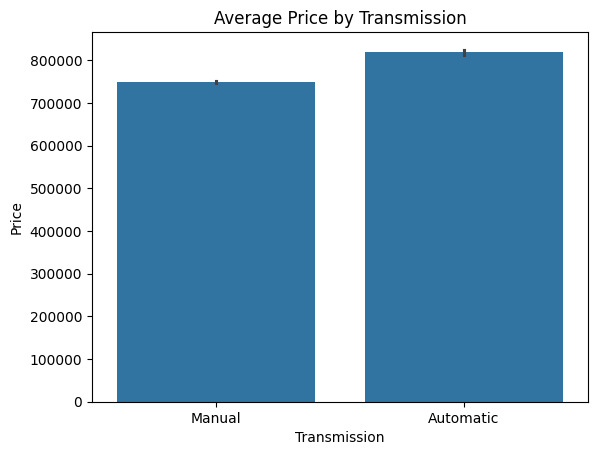

In [27]:
# Average Price by Transmission

sns.barplot(x='Transmission', y='Price', data=car_data, estimator='mean')
plt.title("Average Price by Transmission")
plt.show()

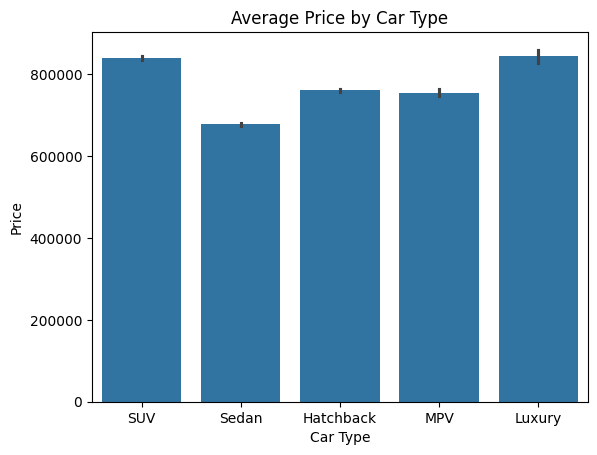

In [28]:
# Average Price by Car Type 

sns.barplot(x='Car Type', y='Price', data=car_data, estimator='mean')
plt.title("Average Price by Car Type")
plt.show()

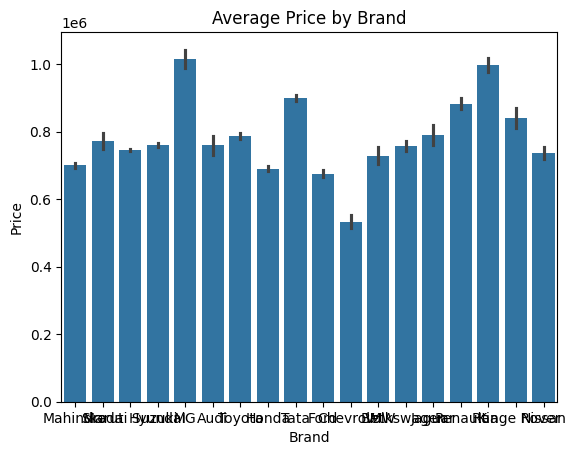

In [29]:
# Average Price by Brand

sns.barplot(x='Brand', y='Price', data=car_data, estimator='mean')
plt.title("Average Price by Brand")
plt.show()

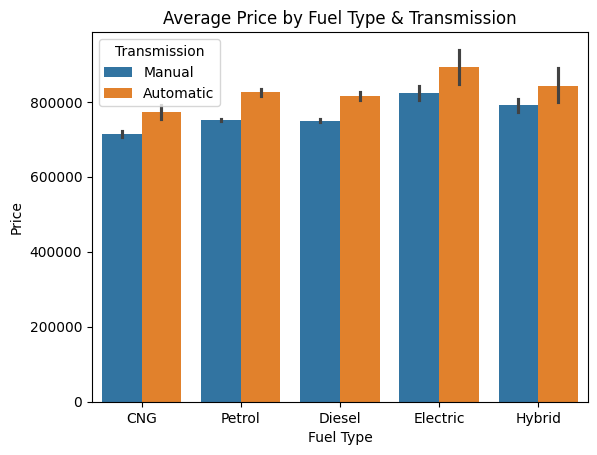

In [30]:
# Multi-variable Analysis

# Fuel Type + Transmission vs Price

sns.barplot(x="Fuel Type", y="Price", hue="Transmission", data=car_data, estimator="mean")
plt.title("Average Price by Fuel Type & Transmission")
plt.show()



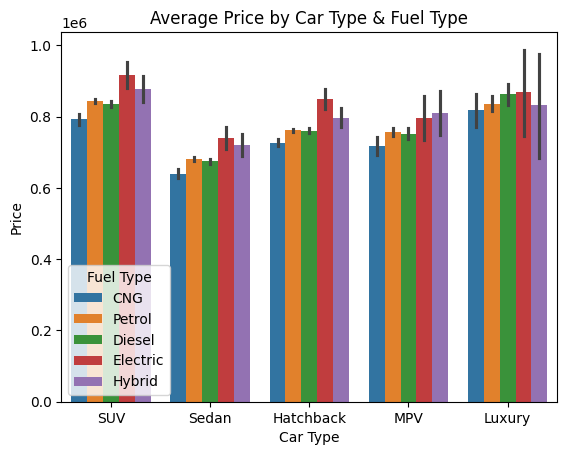

In [31]:
# Car Type + Fuel Type vs Price

sns.barplot(x="Car Type", y="Price", hue="Fuel Type", data=car_data, estimator="mean")
plt.title("Average Price by Car Type & Fuel Type")
plt.show()

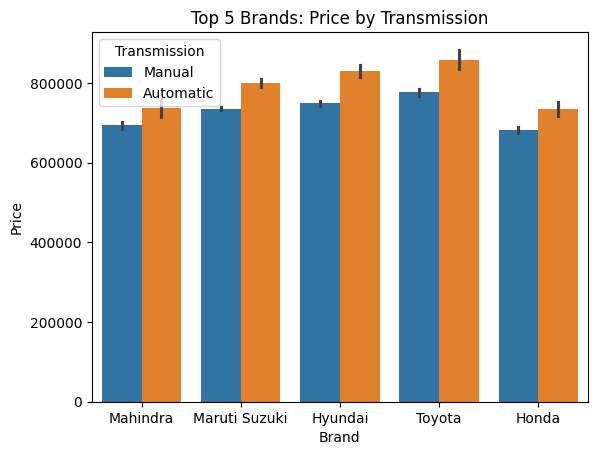

In [32]:
# Brand + Transmission vs Price (optional but strong for portfolio)

top_brands = car_data['Brand'].value_counts().head(5).index
subset = car_data[car_data['Brand'].isin(top_brands)]

sns.barplot(x="Brand", y="Price", hue="Transmission", data=subset, estimator="mean")
plt.title("Top 5 Brands: Price by Transmission")
plt.show()

In [33]:
car_data.dtypes

Brand             object
Model Name        object
Model Variant     object
Car Type          object
Transmission      object
Fuel Type         object
Year               int64
Kilometers         int64
Owner             object
State             object
Accidental        object
Price            float64
dtype: object

In [34]:
car_data.to_csv('car_data.csv', index=False)